<a href="https://colab.research.google.com/github/loga-nancy/PythonBasic/blob/master/Copy_of_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

DESCRIPTION
Mtcars, an Automobile company in Chambersburg, United States, has recorded the production of its cars within a dataset. The company is coming up with a new model based on the feedback given by its customers. It has to explore the current dataset to derive further insights from it.

The mtcars dataset has information regarding the following features of a car

Mileage: mpg

* Number of Cylinders: cyl
* Engine Displacement: disp
* Engine horse power: hp
* Drat : drat
* Car weight: wt
* Acceleration: qsec
* Transmission: am
* Gear box speeds: gear
This application can help a user take a informed buying decision - What gear system the car might have

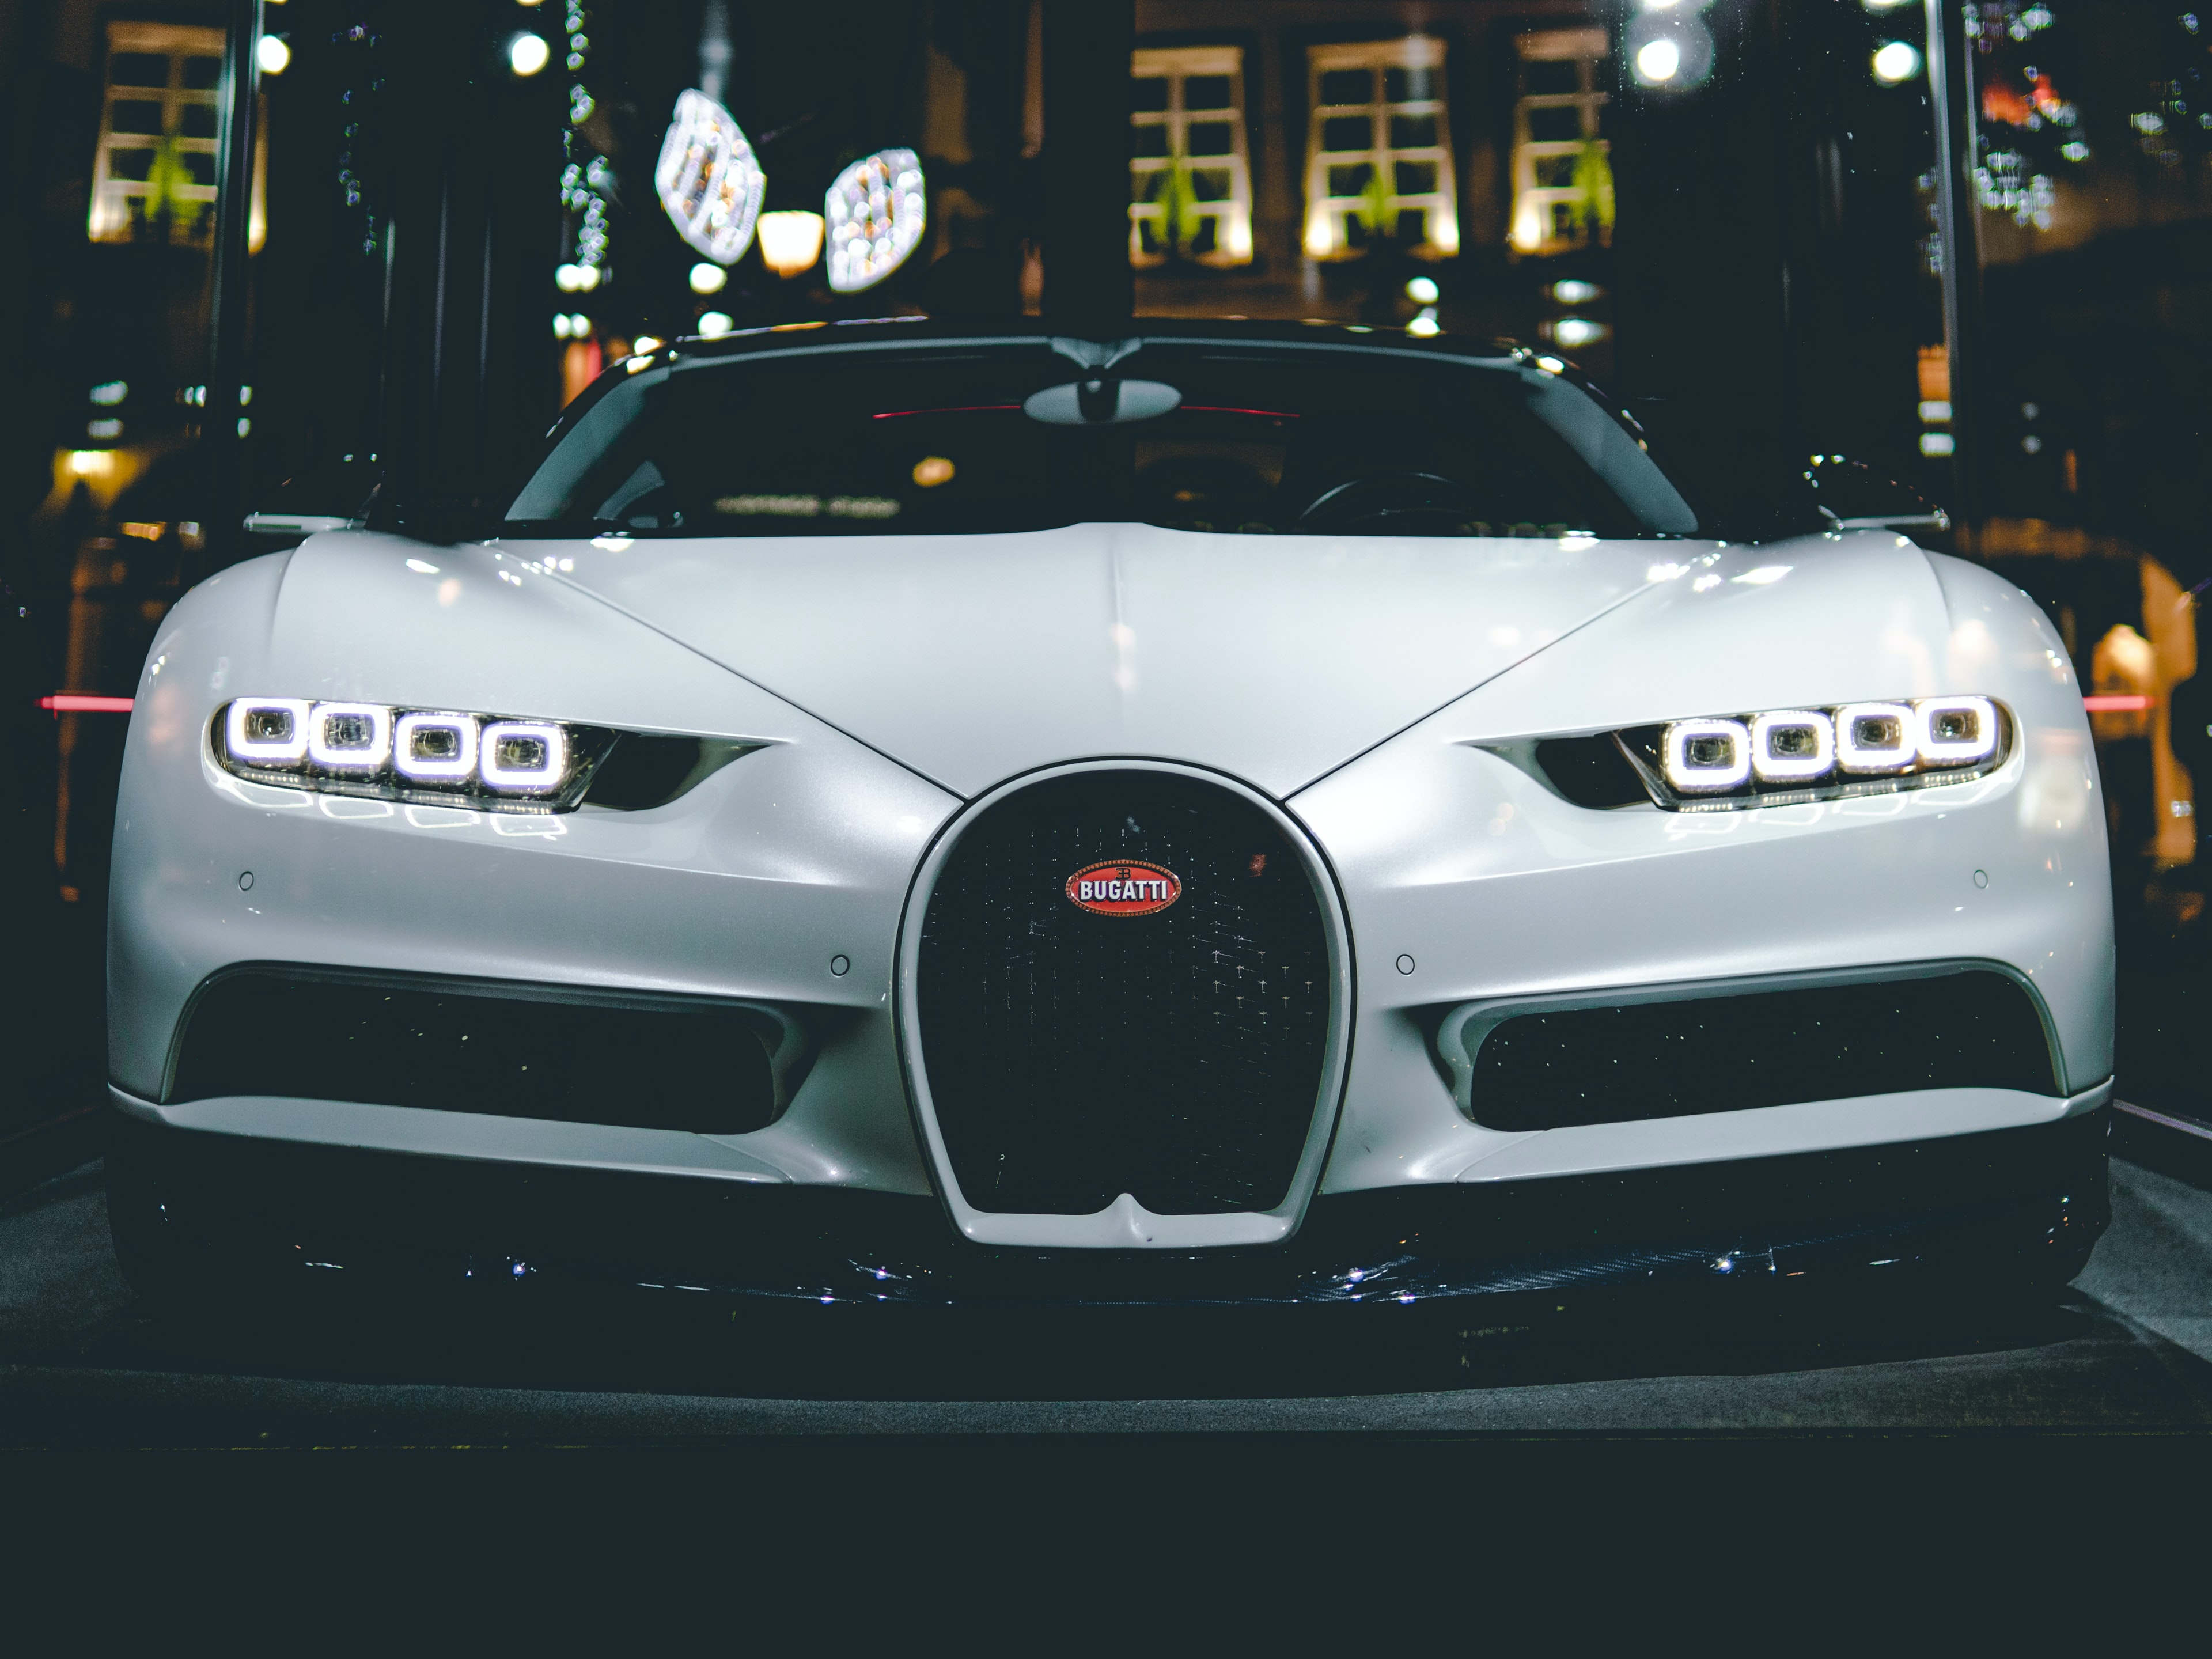

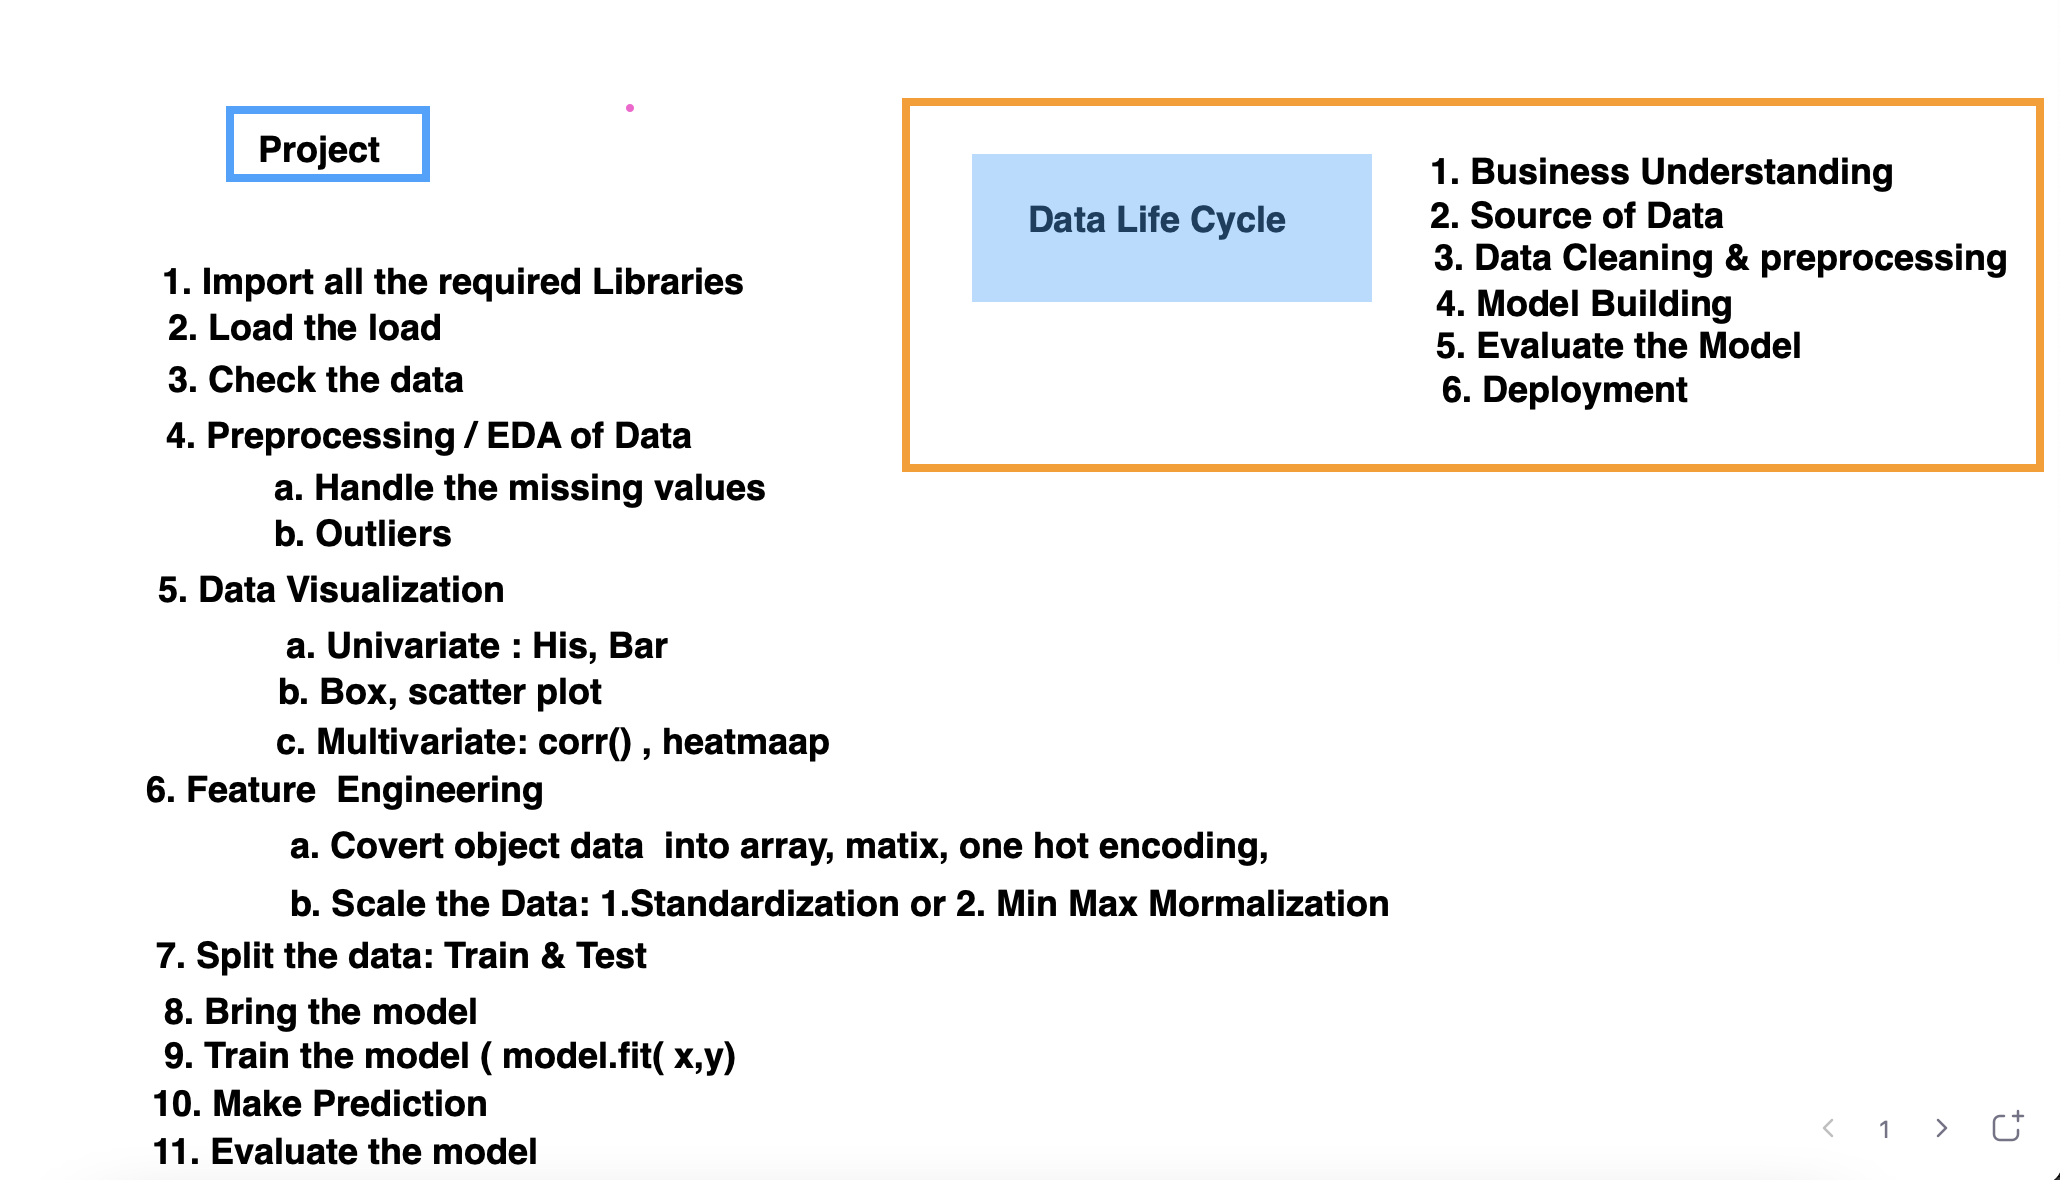

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy import stats

In [ ]:
df=pd.read_csv('cars.csv')

In [ ]:
df.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.AM.value_counts()

0    19
1    13
Name: AM, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     32 non-null     object 
 1   MPG       32 non-null     float64
 2   Cylinder  32 non-null     int64  
 3   Disp      32 non-null     float64
 4   HP        32 non-null     int64  
 5   Drat      32 non-null     float64
 6   Wt        32 non-null     float64
 7   Qsec      32 non-null     float64
 8   VS        32 non-null     int64  
 9   AM        32 non-null     int64  
 10  Gear      32 non-null     int64  
 11  Carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
df.describe()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.403125,147.531250,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.788090,70.012434,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,197.000000,118.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,201.250000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


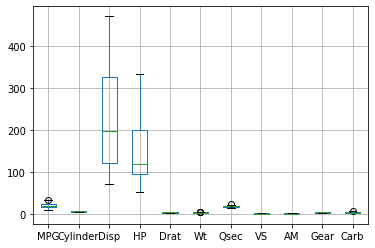

In [ ]:
df.boxplot()

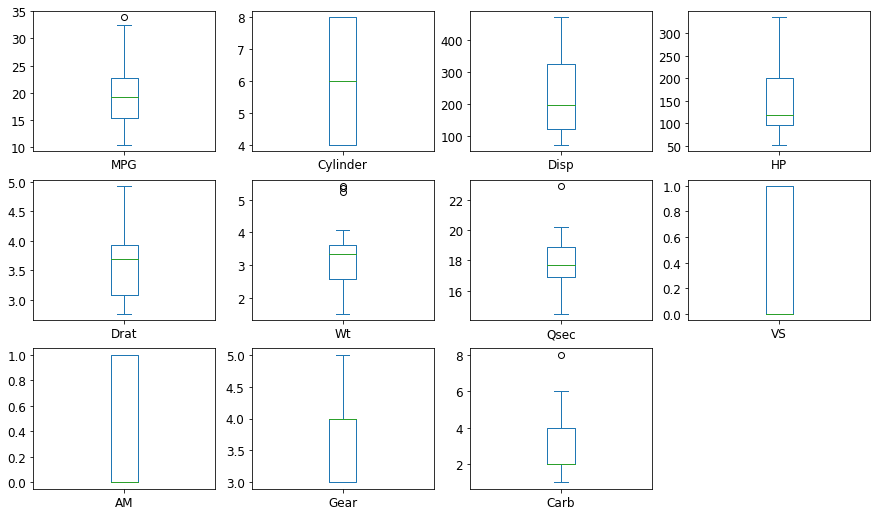

In [ ]:
df.plot(kind='box', subplots=True, layout=(5,4), fontsize=12, figsize=(15,15))
plt.show()

In [ ]:
df.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [ ]:
df.fillna()

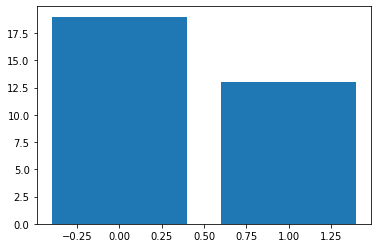

In [ ]:
counts=df['AM'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

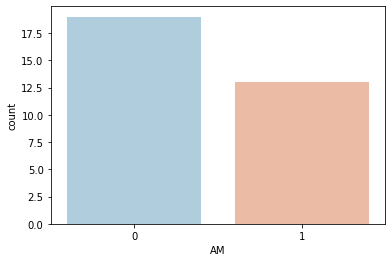

In [ ]:
sns.countplot(x='AM', data=df, palette='RdBu_r')
plt.show()

In [ ]:
df.Gear.value_counts()

3    15
4    12
5     5
Name: Gear, dtype: int64

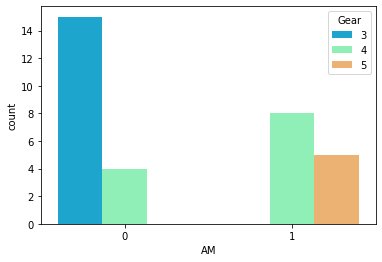

In [ ]:
sns.countplot(x='AM', hue='Gear', data=df, palette='rainbow')
plt.show()

# Training & Test Split

In [ ]:
y=df.AM
X=df.loc[:,['MPG', 'HP', 'Wt']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.20)

In [ ]:
len(X_train)

25

In [ ]:
len(y_test)

7

# Import Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
y_test

28    1
15    0
14    0
25    1
11    0
21    0
12    0
Name: AM, dtype: int64

In [ ]:
pd.DataFrame([y_predict, y_test])

,0,1,2,3,4,5,6
0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0


# Model Evaluate

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [ ]:
accuracy_score(y_test, y_predict)

1.0

In [ ]:
confusion_matrix(y_test, y_predict)

array([[5, 0],
       [0, 2]])